In [1]:
from synthetic_data import SyntheticCalciumDataGenerator, LorenzSystem, EmbeddedLowDNetwork
from infer_latent import plot_3d
import yaml
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

/home/luke/Documents/Projects/RichardsPostdoc/hierarchical_lfads/infer_latent.py:13: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [2]:
params = yaml.load(open('./synth_data/lorenz_params.yaml'), Loader=yaml.FullLoader)

In [3]:
lorenz = LorenzSystem(num_inits= params['inits'],
                      dt= params['dt_sys'])

net = EmbeddedLowDNetwork(low_d_system = lorenz,
                          net_size = params['cells'],
                          base_rate = params['rate_scale'],
                          dt = params['dt_sys'])

generator = SyntheticCalciumDataGenerator(system     = net,
                                          seed       = 12345,
                                          trainp     = params['trainp'],
                                          burn_steps = 1000,
                                          num_steps  = 100,
                                          num_trials = params['trials'],
                                          tau_cal    = 0.3,
                                          dt_cal     = 0.1,
                                          sigma      = 0.2)

In [4]:
data_dict = generator.generate_dataset()

In [5]:
Z = data_dict['train_latent']

In [6]:
Z.shape

(1040, 100, 3)

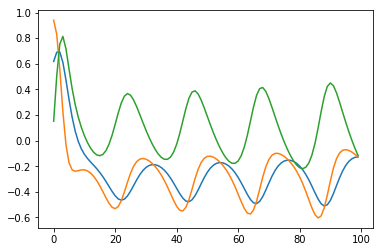

In [7]:
plt.plot(Z[2]);

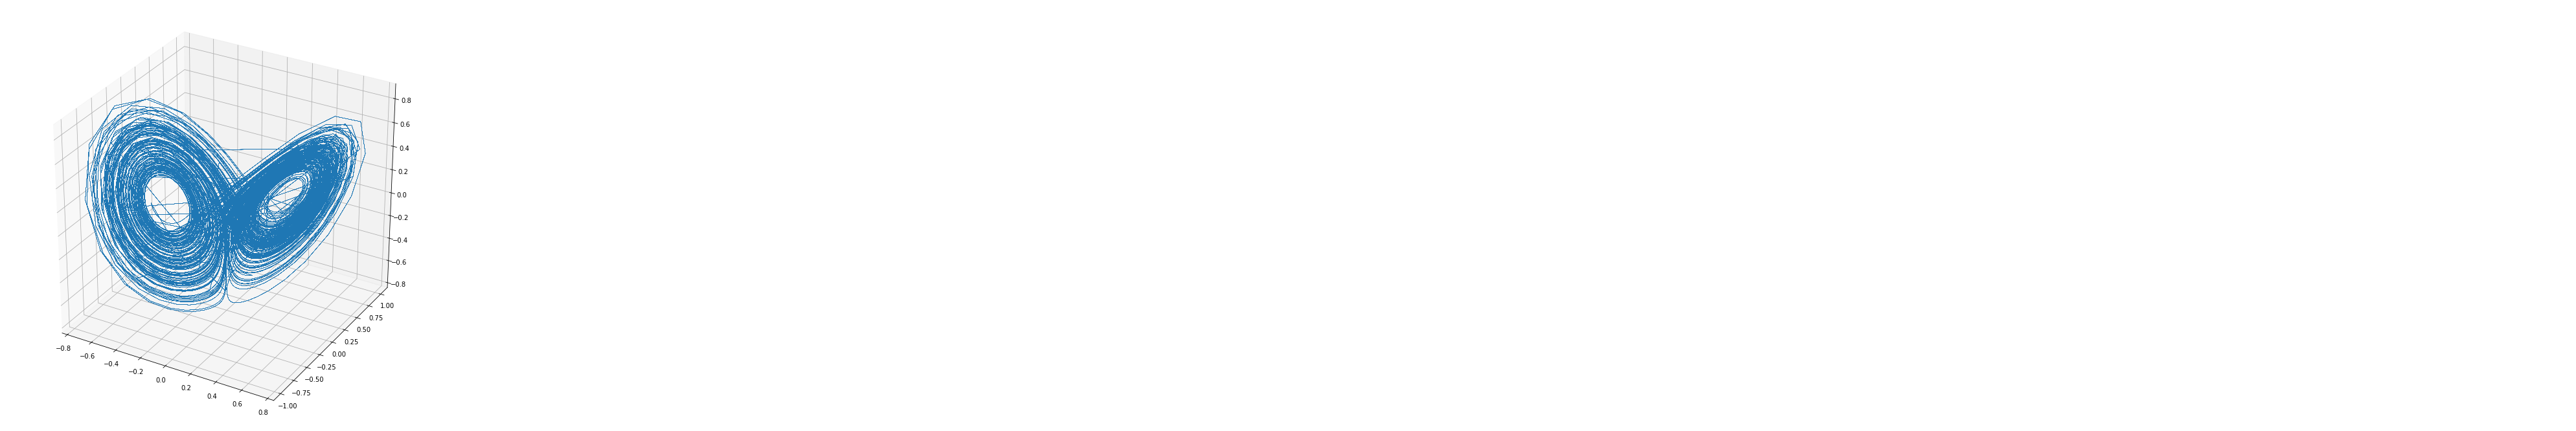

Signature: ax.view_init(elev=None, azim=None)
Source:   
    def view_init(self, elev=None, azim=None):
        """
        Set the elevation and azimuth of the axes.

        This can be used to rotate the axes programmatically.

        'elev' stores the elevation angle in the z plane.
        'azim' stores the azimuth angle in the x,y plane.

        if elev or azim are None (default), then the initial value
        is used which was specified in the :class:`Axes3D` constructor.
        """

        self.dist = 10

        if elev is None:
            self.elev = self.initial_elev
        else:
            self.elev = elev

        if azim is None:
            self.azim = self.initial_azim
        else:
            self.azim = azim
File:      ~/anaconda2/envs/pytorch11/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py
Type:      method


In [52]:
Zf = Z.reshape(np.prod(Z.shape[:-1]), Z.shape[-1]).T
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Zf[0], Zf[1], Zf[2], lw=.1)
ax.view_init??

In [9]:
R = data_dict['train_rates']

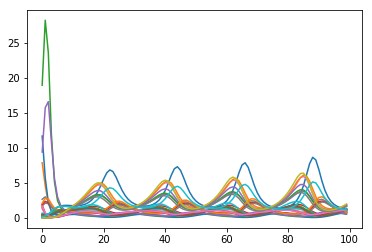

In [10]:
plt.plot(R[2]);

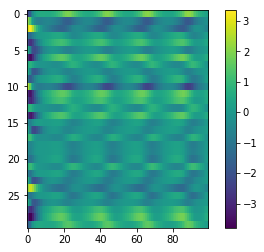

In [11]:
plt.imshow(np.log(R[2].T), aspect=4)
plt.colorbar()

In [12]:
S = data_dict['train_spikes']

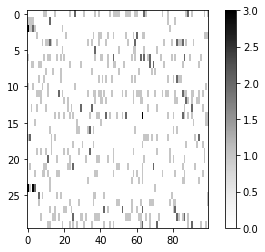

In [13]:
plt.imshow(S[2].T, cmap=plt.cm.Greys, aspect=4)
plt.colorbar()

In [14]:
S.sum()/(S.shape[0] * 10 * S.shape[2])

1.450551282051282

In [15]:
C = data_dict['train_calcium']

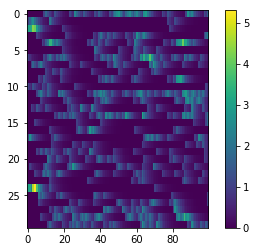

In [16]:
plt.imshow(C[2].T, aspect=4)
plt.colorbar()

In [17]:
F = data_dict['train_fluor']

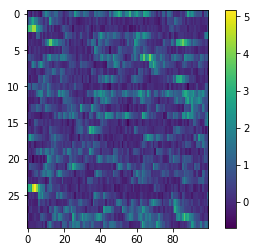

In [18]:
plt.imshow(F[2].T, aspect=4)
plt.colorbar()

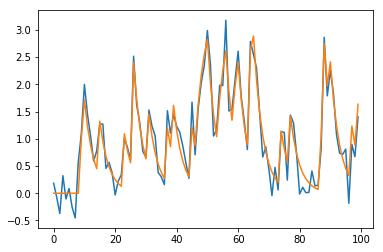

In [42]:
num_trials, num_steps, num_cells = F.shape
data = F.reshape(num_trials * num_steps, num_cells)
plt.plot(data[200:300,0])
plt.plot(C[2, :100, 0])

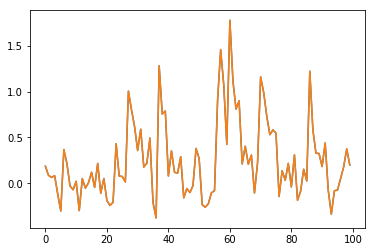

In [43]:
data = data.reshape(num_trials, num_steps, num_cells)
plt.plot(data[10, :, 20])
plt.plot(F[10, :, 20])

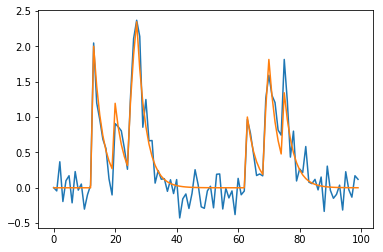

In [45]:
num_trials, num_steps, num_cells = F.shape
data = F.transpose(0, 2, 1)
data = data.reshape(num_trials * num_cells, num_steps)
plt.plot(data[5])
plt.plot(C[0, :, 5])

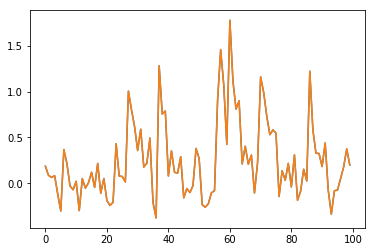

In [46]:
data = data.reshape(num_trials, num_cells, num_steps).transpose(0, 2, 1)
plt.plot(data[10, :, 20])
plt.plot(F[10, :, 20])

In [201]:
from synthetic_data import ChaoticNetwork, RandomPerturbation

params = yaml.load(open('./synth_data/chaotic-rnn_params.yaml'), Loader=yaml.FullLoader)

inputs = RandomPerturbation(t_span=[0.25, 0.75], scale=10)

net = ChaoticNetwork(num_inits= params['inits'],
                     base_rate= 1.0,
                     net_size = params['cells'],
                     weight_scale = 2.5,
                     dt=0.1,
                     inputs = inputs)

generator = SyntheticCalciumDataGenerator(system     = net,
                                          seed       = 12345,
                                          trainp     = params['trainp'],
                                          burn_steps = 0,
                                          num_steps  = 100,
                                          num_trials = params['trials'],
                                          tau_cal    = 0.3,
                                          dt_cal     = 0.1,
                                          sigma      = 0.2)

In [202]:
data_dict = generator.generate_dataset()

In [203]:
I = data_dict['train_inputs']

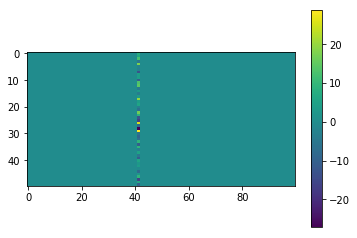

In [204]:
plt.imshow(I[1020].T)
plt.colorbar()

In [205]:
R = data_dict['train_rates']

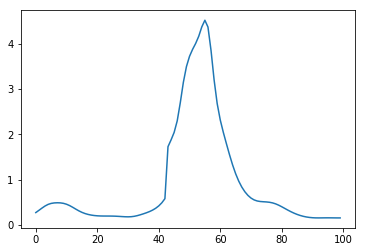

In [206]:
plt.plot(R[20, :, 26]);

In [208]:
R.min()

0.008682799786147317

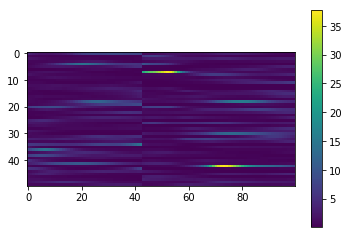

In [30]:
plt.imshow(R[20].T)
plt.colorbar()

In [31]:
np.max(R)

92.11186243562817

In [32]:
S = data_dict['train_spikes']

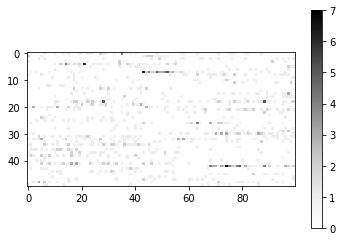

In [33]:
plt.imshow(S[20].T, cmap=plt.cm.Greys)
plt.colorbar()

In [34]:
C = data_dict['train_calcium']

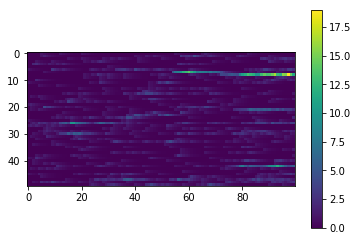

In [35]:
plt.imshow(C[2].T)
plt.colorbar()

In [36]:
F = data_dict['train_fluor']

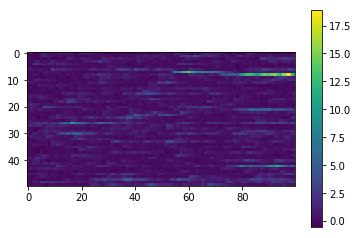

In [37]:
plt.imshow(F[2].T)
plt.colorbar()

In [38]:
from utils import read_data

In [267]:
data_dict = read_data('./synth_data/chaotic-rnn_12345_ok_t0.3_s1.0')

In [269]:
F = data_dict['train_fluor']
C = data_dict['train_calcium']
S = data_dict['train_spikes']
oC = data_dict['train_ocalcium']
oS = data_dict['train_ospikes']

# b = data_dict['obs_bias_init']

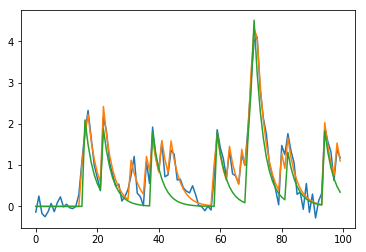

In [104]:
plt.plot(F[10, :, 10])
plt.plot(C[10, :, 10])
plt.plot(oC[10, :, 10] + b[10])

In [105]:
tau = dt * C[:, :-1] / (C[:, :-1] - C[:, 1:])

/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


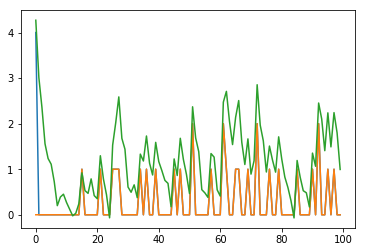

In [282]:
plt.plot(S[2143, :, 0])
plt.plot(oS[2143, :, 0])
plt.plot(F[2143, :, 0])

In [283]:
import oasis

/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [296]:
c, s, b, g, lam =  oasis.functions.deconvolve(np.insert(F[2143, :, 0], 0, 0), penalty=0)
c = c[1:]
s = s[1:]

/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 101, using nperseg = 101
  .format(nperseg, input_length))
/home/luke/anaconda2/envs/pytorch11/lib/python3.5/site-packages/oasis/functions.py:815: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[1:])[0]


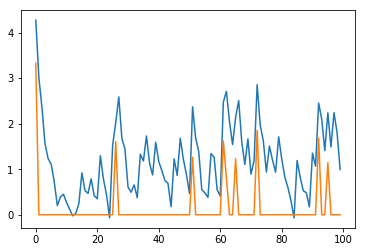

In [297]:
plt.plot(F[2143, :, 0])
plt.plot(s)

In [303]:
np.hstack((np.zeros((F.shape[0], 1, F.shape[2])), F)).shape

(3200, 101, 50)

In [ ]:
oasis.functions.deconvolve()

In [277]:
np.argmax(S[:, 0, 0])

2143

In [276]:
F.mean(axis=0).mean(axis=-1)

array([0.25040292, 0.43286017, 0.56494198, 0.65570623, 0.72241929,
       0.77029287, 0.80294405, 0.82793935, 0.845531  , 0.85673511,
       0.86476349, 0.86985163, 0.87402795, 0.87751818, 0.88062681,
       0.88316733, 0.88427552, 0.88633886, 0.88785649, 0.8885423 ,
       0.88665101, 0.88715689, 0.88517797, 0.88601149, 0.88595051,
       0.88920903, 0.88691246, 0.88724903, 0.88791105, 0.8911309 ,
       0.8928073 , 0.89122888, 0.89096958, 0.89203343, 0.89227502,
       0.89504503, 0.89509242, 0.89540925, 0.89563926, 0.89714855,
       0.89743525, 0.89732792, 0.89571721, 0.8970374 , 0.89668513,
       0.89441641, 0.89561168, 0.89547486, 0.89430127, 0.89552025,
       0.89414029, 0.89625049, 0.89907547, 0.89855705, 0.89889704,
       0.89749222, 0.89881806, 0.89804059, 0.89961977, 0.89819283,
       0.9013227 , 0.90053542, 0.90019953, 0.89861516, 0.89758625,
       0.89819213, 0.89811525, 0.89929463, 0.90100055, 0.9019855 ,
       0.90049577, 0.89977081, 0.90219165, 0.90085564, 0.90249

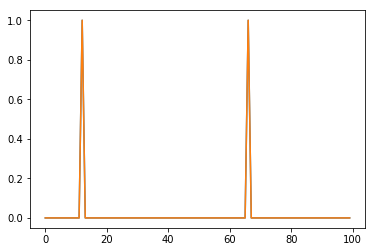

In [270]:
plt.plot(S[10, :, 10])
plt.plot(oS[10, :, 10])

In [107]:
data_dict['obs_tau_init']

array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3])

In [108]:
data_dict['obs_bias_init']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [109]:
data_dict['obs_gain_init']

array([1.12801307, 1.13611638, 1.14705536, 1.13494807, 1.12944291,
       1.13922777, 1.12716417, 1.13360921, 1.12760109, 1.13186859,
       1.1400734 , 1.12950289, 1.17085687, 1.12665996, 1.14767938,
       1.17374872, 1.1324404 , 1.14426411, 1.13090403, 1.13047612,
       1.13171555, 1.14319842, 1.13900772, 1.20554179, 1.21005068,
       1.13548693, 1.141229  , 1.13437295, 1.18822565, 1.12451443])

In [110]:
data_dict['obs_var_init']

array([0.05089654, 0.05163042, 0.05262944, 0.05152429, 0.05102565,
       0.0519136 , 0.05081996, 0.05140279, 0.05085937, 0.05124506,
       0.05199069, 0.05103107, 0.05483623, 0.05077451, 0.05268672,
       0.05510744, 0.05129685, 0.05237361, 0.05115776, 0.05111905,
       0.0512312 , 0.05227611, 0.05189354, 0.05813324, 0.05856891,
       0.05157322, 0.05209615, 0.05147208, 0.05647521, 0.05058131])

In [88]:
dt = data_dict['dt']

In [89]:
g = np.exp(-dt/0.3)

In [90]:
tau = -dt/np.log(g)

In [91]:
tau

0.30000000000000004

In [39]:
from synthetic_data import DynamicalSystem

In [76]:
class VanDerPol(DynamicalSystem):
    def __init__(self, num_inits= 1, mu=1.0, dt=1.0):
        self.mu = mu
        self.state_size = 2
        self.num_inits = num_inits
        self.state = np.random.randn(self.num_inits, self.state_size)
        self.dt = dt
                
    def gradient(self, state):
        u, v = state.T
        du = v
        dv = self.mu*(1-u**2)*v - u
        return np.array([du, dv]).T
        

In [198]:
D = VanDerPol(mu=5.0, dt=0.1)

In [199]:
y = D.integrate(burn_steps=100, num_steps=1000, inputs=None)

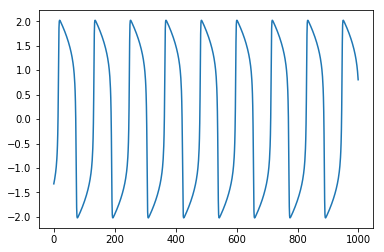

In [200]:
plt.plot(y[:, :, 0])